In [2]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from KMeansAMoi import KMeans

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
kmeans = KMeans(k=3)
kmeans.fit(X)
labels = kmeans.predict(X)

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

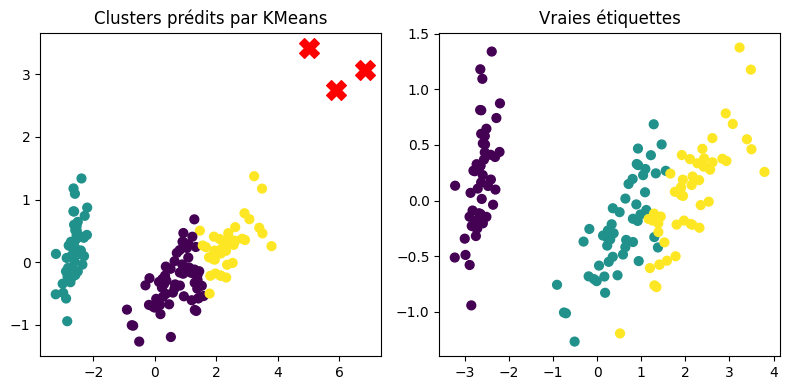

In [6]:
plt.figure(figsize=(8, 4))

# Clusters trouvés par KMeans
plt.subplot(1, 2, 1)
plt.title("Clusters prédits par KMeans")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=40)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='X', c='red', s=200)

# Vraies classes
plt.subplot(1, 2, 2)
plt.title("Vraies étiquettes")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=40)

plt.tight_layout()
plt.show()